# Project: Exploratory Data Analysis on Seattle Airbnb Data

#### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

#### Content
The following Airbnb data is included in this Seattle dataset:
- Listings, including full descriptions and average review score
- Reviews, including unique id for each reviewer and detailed comments
- Calendar, including listing id and the price and availability for that day

**To get the dataset click [here](https://georgiancollege-my.sharepoint.com/:f:/g/personal/katie_tiwari_georgiancollege_ca/Eh6hG8jQX_FBvU_pk5R5wZwB_xn5gS2eBE1vWQ_DmaH1kQ?e=evqomn)**

#### Inspiration for questions
- Can you describe the vibe of each Seattle neighborhood using listing descriptions?
  - What are the busiest times of the year to visit Seattle? By how much do prices spike?
- Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?

#### **Note:** Don't discuss the results, limitations, conclusion, reasons as comment in the code cell. Use separate markdown cells instead. If you are not familier with markdown, refer this [link here](https://www.datacamp.com/community/tutorials/markdown-in-jupyter-notebook). Only add code related comments as comment in the code cell. Also Make sure to add comments in the code.

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this section of the report, provide a brief introduction to the dataset you've selected for analysis. 

- Create atleast three complex and meaningful questions(refer inspiration questions to get an idea), then address those questions in the rest of the analysis. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.
- **Include the 3 research questions here**



In [1]:
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")

<h3> Load the datasets</h3>

In [2]:
df_calender = pd.read_csv('calendar.csv')
df_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_listings = pd.read_csv('listings.csv')
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [4]:
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


## Data Wrangling

In this section of the report,we will check for cleanliness, merging multiple files, printing some rows of the data in output, handling missing values, duplicat values, outliers etc. and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and privde the reasoning for every decision taken.

### Calender Dataset

In [5]:
df_calender.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [6]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [7]:
# check duplicated values
df_calender[df_calender.duplicated()]

,listing_id,date,available,price


In [8]:
#checking for null values
df_calender.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [9]:
# convert date column type to date 
df_calender['date'] = pd.to_datetime(df_calender['date'])
# check
type(df_calender.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
# convert listing_id type to string
df_calender['listing_id'] = df_calender['listing_id'].astype(str)
# check
type(df_calender.listing_id.iloc[0])

str

In [11]:
# === price column === 

# replace the nan value in price to 0
df_calender['price'].fillna(0, inplace=True)

# remove the symbols in price
def remove_symbol(price):
    """remove the symbols ['$', ','] in price"""
    if type(price) is str:
        return re.sub("[\$,]",'',price)
    return price
    
df_calender['price'] = df_calender.price.apply(remove_symbol)

# convert the price type to float
df_calender['price'] = df_calender['price'].astype(float)

In [12]:
# check
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  object        
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       1393570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 42.5+ MB


The Calender dataset contained 4 columns and following observations and changes where made:
- The columns had 1 integer and 3 object datatypes
- All the columns apart from the Price column had no null values
- All the columns do not have any duplicate values
- date,listing_id,price columns where changed to str,datetime and float types respectivily
- removed symbols from price column and filled the null values with 0

<h4> Reviews_Dataset </h4>

In [13]:
df_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [14]:
# check duplicated values
df_reviews[df_reviews.duplicated()]

,listing_id,id,date,reviewer_id,reviewer_name,comments


In [15]:
#check for null values
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [16]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [17]:
# convert listing_id type to string
df_reviews['listing_id'] = df_reviews['listing_id'].astype(str)
# check
type(df_reviews.listing_id.iloc[0])

str

In [18]:
# convert id type to string
df_reviews['id'] = df_reviews['id'].astype(str)
# check
type(df_reviews.id.iloc[0])

str

In [19]:
# convert date column type to date 
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
# check
type(df_reviews.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [20]:
# drop review_id and reveiew_name 
df_reviews.drop(['reviewer_id', 'reviewer_name'], axis=1, inplace=True)

In [21]:
# reomove null rows
df_reviews.dropna(subset=['comments'], inplace=True)

In [22]:
# check 
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   listing_id  84831 non-null  object        
 1   id          84831 non-null  object        
 2   date        84831 non-null  datetime64[ns]
 3   comments    84831 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.2+ MB


The following observations and changes where made to Reviews dataset:
- The dataset contains 6 columns 3 int and 3 object. 
- Apart from comments columns rest of the columns donot have any null values.
- No duplicated values are present.
- change listing_id id, date to string and date types respectivily.
- droping reviewer_id and reviewer_name columns from the dataset.
- handling the null values in comments by droping them.

<h4> Listings_Dataset </h4>

In [23]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [24]:
# take the important columns
df_listings_1 = df_listings[['id','host_response_time','host_response_rate','accommodates','bathrooms','bedrooms','beds','price','weekly_price','monthly_price'
,'cleaning_fee','extra_people','minimum_nights','review_scores_rating','instant_bookable']]

In [25]:
df_listings_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   host_response_time    3295 non-null   object 
 2   host_response_rate    3295 non-null   object 
 3   accommodates          3818 non-null   int64  
 4   bathrooms             3802 non-null   float64
 5   bedrooms              3812 non-null   float64
 6   beds                  3817 non-null   float64
 7   price                 3818 non-null   object 
 8   weekly_price          2009 non-null   object 
 9   monthly_price         1517 non-null   object 
 10  cleaning_fee          2788 non-null   object 
 11  extra_people          3818 non-null   object 
 12  minimum_nights        3818 non-null   int64  
 13  review_scores_rating  3171 non-null   float64
 14  instant_bookable      3818 non-null   object 
dtypes: float64(4), int64(

In [26]:
# convert id type to string
df_listings_1['id'] = df_listings_1['id'].astype(str)
# check
type(df_listings_1.id.iloc[0])

str

In [27]:
# impute the nan value with mode
df_listings_1.beds.fillna(df_listings_1.beds.mode()[0], inplace=True)

# covert the beds to int
df_listings_1['beds'] = df_listings_1.beds.astype(int)

In [28]:
# === price column === 

# replace the nan value in price to 0
df_listings_1['price'].fillna(0, inplace=True)

# remove the symbols in price
def remove_symbol(price):
    """remove the symbols ['$', ','] in price"""
    if type(price) is str:
        return re.sub("[\$,]",'',price)
    return price
    
df_listings_1['price'] = df_listings_1.price.apply(remove_symbol)

# convert the price type to float
df_listings_1['price'] = df_listings_1['price'].astype(float)

In [29]:
# check
df_listings_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   object 
 1   host_response_time    3295 non-null   object 
 2   host_response_rate    3295 non-null   object 
 3   accommodates          3818 non-null   int64  
 4   bathrooms             3802 non-null   float64
 5   bedrooms              3812 non-null   float64
 6   beds                  3818 non-null   int32  
 7   price                 3818 non-null   float64
 8   weekly_price          2009 non-null   object 
 9   monthly_price         1517 non-null   object 
 10  cleaning_fee          2788 non-null   object 
 11  extra_people          3818 non-null   object 
 12  minimum_nights        3818 non-null   int64  
 13  review_scores_rating  3171 non-null   float64
 14  instant_bookable      3818 non-null   object 
dtypes: float64(4), int32(

In [30]:
df_listings_1.head()

,id,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable
0,241032,within a few hours,96%,4,1.0,1.0,1,85.0,NaN,NaN,NaN,$5.00,1,95.0,f
1,953595,within an hour,98%,4,1.0,1.0,1,150.0,"$1,000.00","$3,000.00",$40.00,$0.00,2,96.0,f
2,3308979,within a few hours,67%,11,4.5,5.0,7,975.0,NaN,NaN,$300.00,$25.00,4,97.0,f
3,7421966,NaN,NaN,3,1.0,0.0,2,100.0,$650.00,"$2,300.00",NaN,$0.00,1,NaN,f
4,278830,within an hour,100%,6,2.0,3.0,3,450.0,NaN,NaN,$125.00,$15.00,1,92.0,f


In [31]:
# check duplicated values
df_listings_1[df_listings_1.duplicated()]

,id,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable


In [32]:
# covert percentage to float in host_response_rate column
def p2f(x):
    if type(x) is str:
        return float(x.strip('%'))/100
    return 1

df_listings_1['host_response_rate'] = df_listings_1.host_response_rate.apply(p2f)

The following Observations and changes where made to Listings:
- Copied the important columns to df_listings1
- The new Dataframe contains 7 numeric and 8 object data types
- No duplicated values found
- coverted the beds to int
- converted id type to string
- imputed the nan value with mode
- replaced the nan value in price to 0 and convert the price type to float
- coverted percentage to float in host_response_rate column

<a id='eda'></a>
## Exploratory Data Analysis

> Now you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. Look at one variable at a time, and then follow it up by looking at relationships between variables.

- The EDA should include both single-variable (1d) and multiple-variable (2d) explorations. 
- The project's visualizations should be varied and show multiple comparisons and trends. At least three kinds of plots(eg. histogram, box plot, line plot, bar plot, etc) should be created as part of the explorations.
- Please make sure reasoning is provided for each analysis decision, plot, and statistical summary.
- Visualizations made in the notebook, should depict the data in an appropriate manner (i.e., has appropriate axis labels, scale, legends, and title) that allows plots to be readily interpreted.

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
plt.rcParams['figure.figsize'] = (10,5)
# set title for plot
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
base_color = sns.color_palette()[0]

In [36]:
df_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


In [37]:
month = df_calender[df_calender.date.dt.year == 2017]['date'].dt.month.unique()
month = df_calender.date.dt.year
df_calender.groupby([month, 'available']).count()['listing_id']

date  available
2016  f            457090
      t            928844
2017  f              1938
      t              5698
Name: listing_id, dtype: int64

### What is the occupancy rate during 2016 at the level of months?

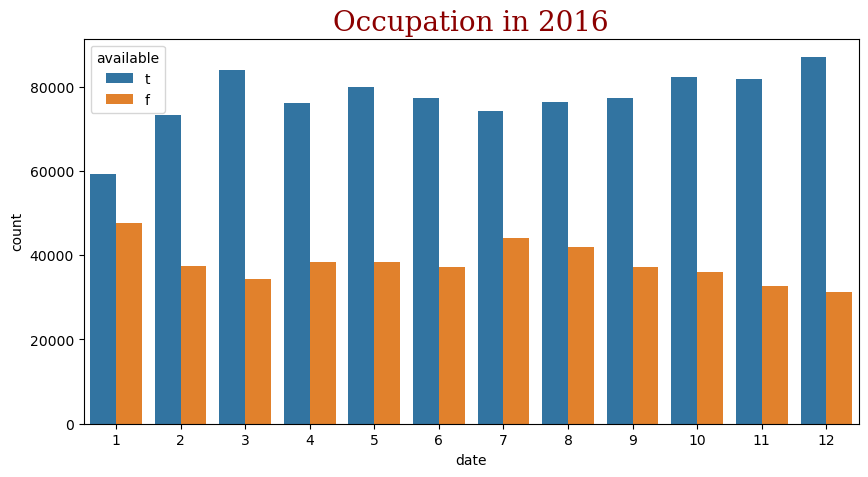

In [38]:
df_calender_2016 = df_calender[df_calender.date.dt.year == 2016]
month = df_calender_2016.date.dt.month
sns.countplot(data = df_calender, x = month, hue = 'available');
plt.title('Occupation in 2016', fontdict=font);

we can notice from the graph that the occupation rate at level of months during 2016 is low specially in months 3,10,11 and 12

### What is the most features affect on the price?

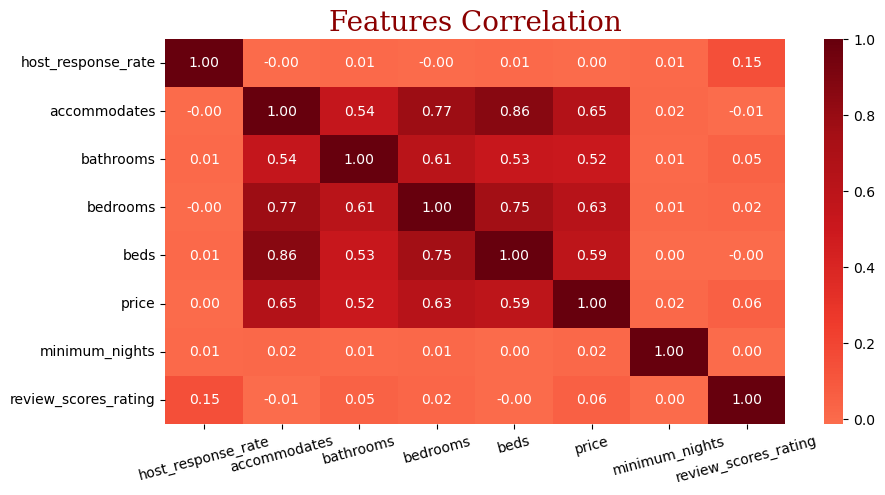

In [42]:
corr = df_listings_1.corr()

kot = corr[corr.apply(lambda x: abs(x)>=0)]

sns.heatmap(kot, annot = True, fmt = '.2f', cmap = 'Reds', center = 0)
plt.title('Features Correlation', fontdict=font);
plt.xticks(rotation = 15);

 we can see that a lot of quantitative feature effect on the price like nu of beds, bathrooms, bedrooms and accommodates

### What is the average price per months?

(0.0, 400.0)

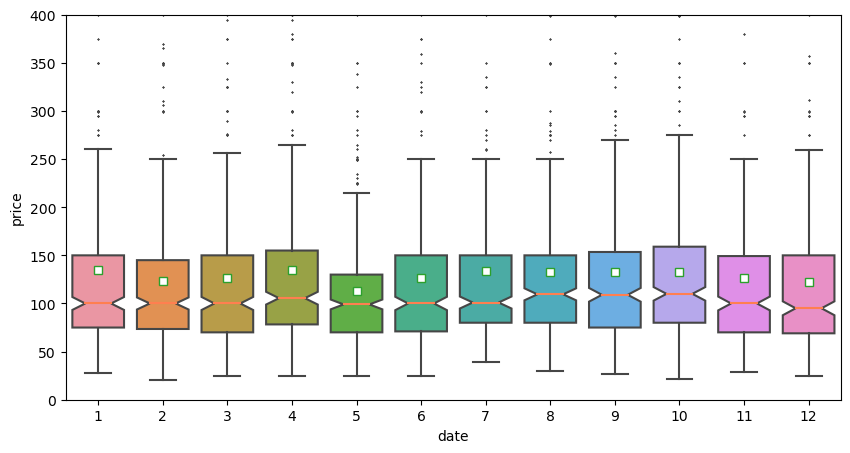

In [47]:
ax2_1 = sns.boxplot(data=df_listings_1, x=month , y='price', fliersize=1, showmeans=True,
                    flierprops={"marker": "x"}, medianprops={"color": "coral"}, notch=True,
                    meanprops={"marker": "s", "markerfacecolor": "white"})
ax2_1.set_xticklabels(ax2_1.get_xticklabels())
ax2_1.set_ylim(0, 400)

 As the boxplot shows, the average price for the summer holiday (April,September and October) is higher than the other period of the whole year. The orange line represents the median value of price in that specific month. The tiny white square represents the average price in that month.

### What is the AVg. host response rate?

In [44]:
print(f"The Avg. host response rate is {round(df_listings_1.host_response_rate.mean(),2)}")

The Avg. host response rate is 0.96


we can see that the host response rate is 96% which is very good in this city

### What is the most host response time?

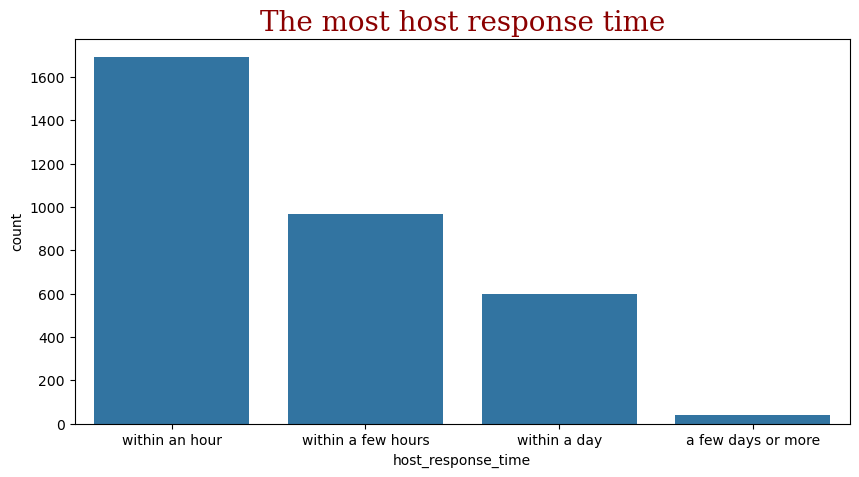

In [45]:
# df_listings_1.host_response_time.value_counts()
cat_order = df_listings_1['host_response_time'].value_counts().index
sns.countplot(data = df_listings_1, x = 'host_response_time', color=base_color, order=cat_order)
plt.title('The most host response time', fontdict=font);

we can see that the most host response time is within an hour

### What is the Rating?

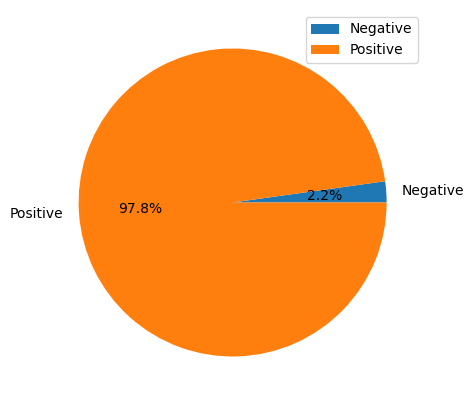

In [70]:
neg_rating = df_listings_1['review_scores_rating'][df_listings_1['review_scores_rating'] < 80]
plt.pie([neg_rating.count(), df_listings_1['review_scores_rating'].count() - neg_rating.count()], labels=['Negative', 'Positive'],
        autopct='%1.1f%%')
plt.legend()

For reviews score in detail, an 8+ score will be defined as a positive rating and a score under 8 will be seen as a negative rating. 
In terms of the score review rating, a score under 80 will be seen as a negative rating
and from the pie chart we can see that 97.8% are positive reviews and 2.2%  are negative reviews

<a id='conclusions'></a>
## Conclusions

> At the end, summarize your findings and the results that have been performed. 
- The Conclusion should reflect on the steps taken during the data exploration, summarize the main findings in relation to the questions provided at the beginning of the analysis accurately.
- The conclusion points out where additional research can be done or where additional information could be useful and **should have at least 1 limitation explained clearly.**
- The analysis should not state or imply that one change causes another based solely on a correlation. You can refer to this video on [Correlation does not mean Causation](https://youtu.be/VMUQSMFGBDo)


**In conclusion**
- we see that occupation in 2016 low and while correlation does not mean causation it certinely gives us a clue on what drives up the prices, we see that the accomadates bathrooms beds certinaly drive up the price. 
- we also see that the avg response time and how wuick they reply is is pretty high considering that seattle is a big city.
- The rating for overall is around 98% which really high review rate for a big city.  

**Limitations:**

One limitation can be the in a big and fast growing city like seattle we can see that a lot of houses are being placed on airBnb rather then for renting purposes which could instead cause a housing crisis down the lane.